In [ ]:
%pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import math
import requests
import csv
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from colour import Color
import seaborn as sns

# data from https://www.pro-football-reference.com/years/2022/defense_advanced.htm

Mounted at /content/drive


In [ ]:
deftable = pd.read_csv('/content/drive/MyDrive/senior_project_2023/tablestats.txt')
deftable.columns = deftable.iloc[0]
deftable = deftable[1:]
deftable = deftable.dropna()
deftable['Player'] = deftable['Player'].str.replace("[+*]","")

z = deftable['Pos']

y = deftable['Rat'].values

# deftable = deftable.drop(['Rat'], axis=1)
deftable = deftable.drop(['Cmp%'], axis=1)


x = deftable.iloc[:, 7:18].values

<ipython-input-3-ce020bc593ca>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  deftable['Player'] = deftable['Player'].str.replace("[+*]","")


In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=11)

principalComponents = pca1.fit_transform(x)

labs = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5',
           'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10',
          'principal component 11']

principalDf = pd.DataFrame(data = principalComponents, columns = labs)

In [ ]:
from sklearn.preprocessing import StandardScaler

features = list(deftable.columns)[7:18]

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [ ]:
# finalDf = pd.concat([principalDf, z], axis = 1)
n1 = [float(i)/sum(pca1.explained_variance_) for i in pca1.explained_variance_]
n1


[0.5284370795695286,
 0.21079947142502403,
 0.09541663779703875,
 0.06447626302311324,
 0.05225248400275739,
 0.02218077032892012,
 0.015682632897727724,
 0.006020946436676796,
 0.003815640160004425,
 0.0009180743592089576,
 1.484269628491839e-32]

<ipython-input-30-3d6fbb391de1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ep1.set_xticklabels(labs, rotation = 90)


0.8346531887915914


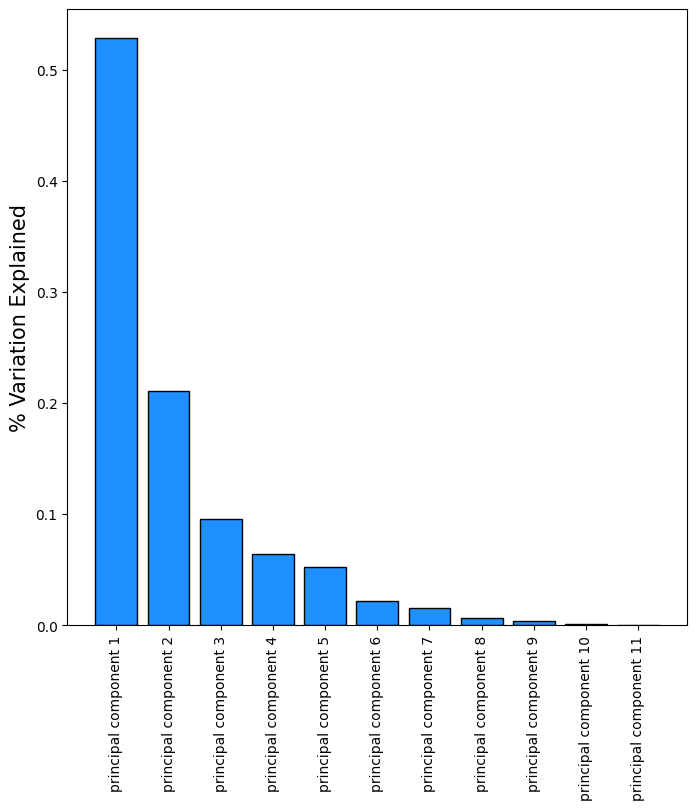

In [ ]:
epf1 = plt.figure(figsize = (8,8))
ep1 = epf1.add_subplot(1,1,1)
ep1.bar(x = labs, height = n1, color = 'dodgerblue', edgecolor = 'black')
ep1.set_xticklabels(labs, rotation = 90)
ep1.set_ylabel('% Variation Explained', fontsize = 15)

print(sum(n1[0:3]))


In [ ]:
heights = pd.read_csv('/content/drive/MyDrive/senior_project_2023/body.csv')
av = pd.read_csv('/content/drive/MyDrive/senior_project_2023/av.csv')

drops = ['Season', 'Age', 'Team', 'G', 'GS', 'Ht..1',
       'BMI', 'Pos', 'Draft', '-9999']

heights = heights.drop(drops, axis=1)

heights = heights.to_dict()
av = av.to_dict()

hdf = pd.DataFrame(heights)
adf = pd.DataFrame(av)

hdf = pd.merge(left=hdf, right=adf, on = 'Player').set_index('Player')


In [ ]:
players = deftable.set_index('Player')
players2 = pd.merge(left = players, right = hdf, left_on = players.index, right_on = hdf.index)
players2 = players2.drop(['Bltz', 'Hrry', 'QBKD', 'Sk', 'Prss', 'Comb', 'MTkl', 'MTkl%', '-9999_x', '-9999_y'], axis=1)
players2 = players2.rename({'key_0':'player'}, axis = 1)


In [ ]:
def ht2in(ht):
  small = ht.split('-')
  small = [int(i) for i in small]
  inin = 12*small[0] + small[1]
  return inin

newht = list(map(ht2in, players2['Ht.'].to_list()))
players2['Ht.'] = newht

In [ ]:
players2[players2.columns[7:]] = players2[players2.columns[7:]].apply(pd.to_numeric)

In [ ]:
grades = pd.read_csv('/content/drive/MyDrive/senior_project_2023/defense_summary.csv')
grades = grades[['player', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense',
       'grades_run_defense', 'grades_tackle']]


grades1 = pd.merge(grades, players2, on = 'player')

grades2 = grades1[['player', 'grades_coverage_defense', 'grades_defense',
                   'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']]

grades2 = grades2.dropna()

grades2


,player,grades_coverage_defense,grades_defense,grades_pass_rush_defense,grades_run_defense,grades_tackle
0,Brandon Graham,79.5,89.8,89.8,69.7,44.5
1,Jason Pierre-Paul,59.1,56.5,56.0,58.7,40.4
2,Kareem Jackson,60.9,64.5,56.7,71.3,57.4
3,Devin McCourty,67.6,70.0,53.8,74.8,90.0
4,Jerry Hughes,68.1,71.4,71.3,59.7,25.6
...,...,...,...,...,...,...
508,Dane Belton,42.3,32.8,47.2,28.9,72.5
509,Leo Chenal,62.6,70.3,63.6,72.0,57.6
511,Rodney Thomas II,54.8,54.3,52.5,55.4,71.5
512,Jaylen Watson,59.9,61.2,77.9,58.6,58.2


In [ ]:
players2

,player,Rk,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,Yds/Cmp,Yds/Tgt,TD,Rat,DADOT,Air,YAC,Ht.,Wt.,AV
0,Foyesade Oluokun,1,JAX,27,LB,17,17,0,90,71,...,7.9,6.2,1,96.3,3.4,187,374,74,215,8
1,Nick Bolton,2,KAN,22,LB,17,17,2,74,61,...,9.5,7.8,1,92.6,3.7,214,366,72,237,7
2,Jordyn Brooks,3,SEA,25,LB,16,16,0,75,54,...,12.8,9.2,5,122.6,5.0,194,495,72,240,7
3,Roquan Smith,4,2TM,25,LB,17,17,3,69,49,...,8.6,6.1,2,78.1,4.4,153,266,73,232,17
4,Zaire Franklin,5,IND,26,LB,17,17,0,73,55,...,8.3,6.3,0,91.1,2.9,102,357,72,235,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Chase Lucas,886,DET,25,CB,6,0,0,1,1,...,6.0,6.0,0,91.7,3.0,3,3,72,185,0
541,Darius Phillips,890,DEN,27,CB,9,0,0,1,1,...,5.0,5.0,0,87.5,-7.0,-7,12,70,190,0
542,Channing Tindall,893,MIA,22,LB,16,0,0,1,1,...,9.0,9.0,0,104.2,6.0,6,3,74,230,1
543,Joshuah Bledsoe,900,NWE,24,S,3,0,0,4,2,...,8.5,4.3,2,101.0,19.3,17,0,72,200,0


In [ ]:
gpca = PCA(n_components=5)

x2 = grades2.iloc[:, 1:].values

principalComponents2 = gpca.fit_transform(x2)

labs2 = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5']

principalDf2 = pd.DataFrame(data = principalComponents2, columns = labs2)

In [ ]:
features2 = list(grades2.columns)[2:]

# Standardizing the features
x2 = StandardScaler().fit_transform(x2)

# finalDf2 = pd.concat([principalDf2, z], axis = 1)
# finalDf2

In [ ]:
n2 = [float(i)/sum(gpca.explained_variance_) for i in gpca.explained_variance_]
n2

[0.4835043274964577,
 0.23259730368730333,
 0.1524361038694657,
 0.11429953705426568,
 0.017162727892507546]

In [ ]:
pcas = PCA(n_components=14)

x3 = players2.iloc[:, 5:].values

principalComponents3 = pcas.fit_transform(x3)

labs3 = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5',
           'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10',
          'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14']

principalDf3 = pd.DataFrame(data = principalComponents3, columns = labs3)

In [ ]:
features3 = list(players2.columns)[5:]

# Standardizing the features
x3 = StandardScaler().fit_transform(x3)


In [ ]:
n3 = [float(i)/sum(pcas.explained_variance_) for i in pcas.explained_variance_]
n3

[0.918119302827579,
 0.05754099029615263,
 0.013926908755371666,
 0.008073510477651306,
 0.0009545924732124798,
 0.0005052719550517733,
 0.0003922977352848753,
 0.00017452082929859703,
 0.0001304167483483404,
 7.553323819676781e-05,
 3.6646162696809876e-05,
 3.5183617812240296e-05,
 1.8078666855121082e-05,
 1.6746216487876266e-05]

<ipython-input-20-3d6fbb391de1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ep1.set_xticklabels(labs, rotation = 90)


0.9980695822752795


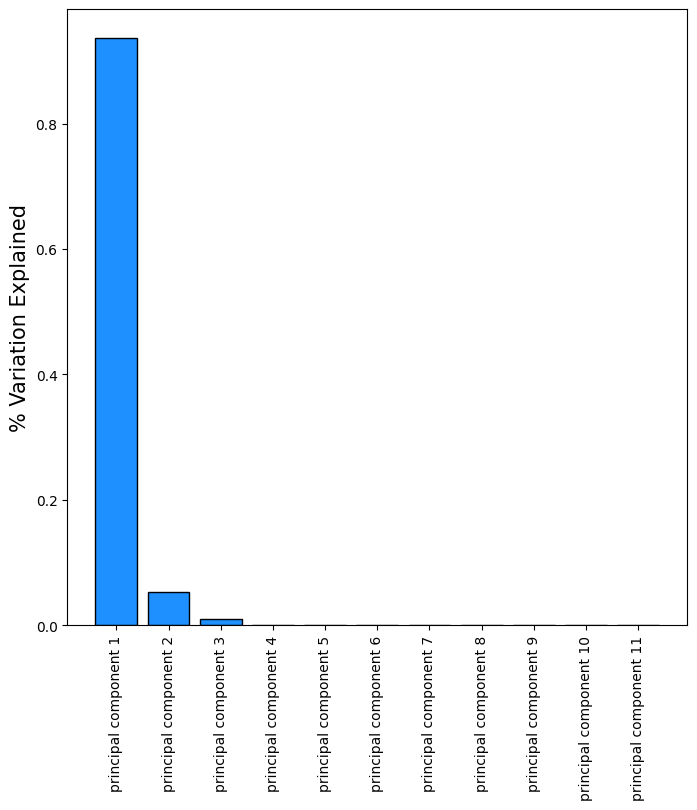

In [ ]:
epf1 = plt.figure(figsize = (8,8))
ep1 = epf1.add_subplot(1,1,1)
ep1.bar(x = labs, height = n1, color = 'dodgerblue', edgecolor = 'black')
ep1.set_xticklabels(labs, rotation = 90)
ep1.set_ylabel('% Variation Explained', fontsize = 15)

print(sum(n1[0:3]))

<ipython-input-21-510213694fba>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ep2.set_xticklabels(labs2, rotation = 90)


0.8685377350532267


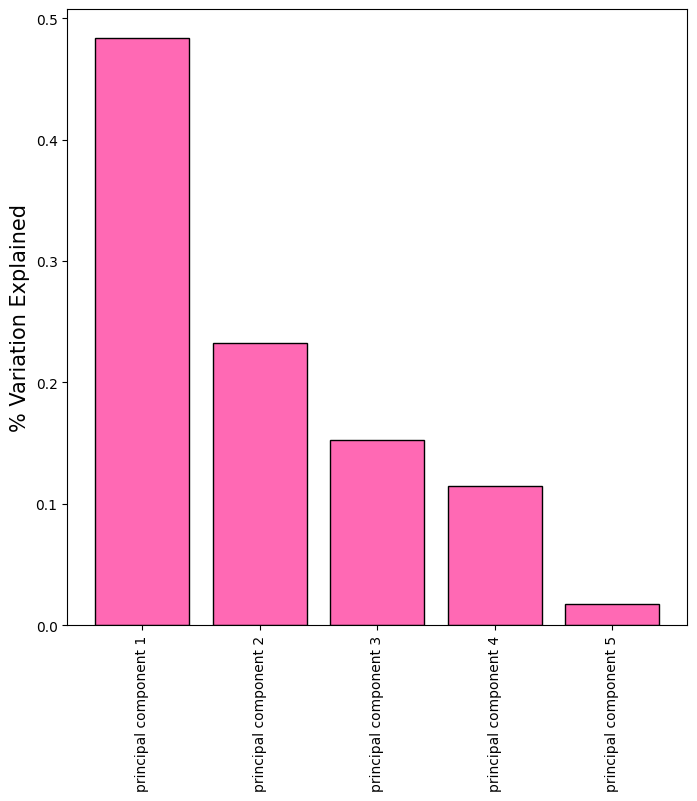

In [ ]:
epf2 = plt.figure(figsize = (8,8))
ep2 = epf2.add_subplot(1,1,1)
ep2.bar(x = labs2, height = n2, color = 'hotpink', edgecolor = 'black')
ep2.set_xticklabels(labs2, rotation = 90)
ep2.set_ylabel('% Variation Explained', fontsize = 15)

print(sum(n2[0:3]))

<ipython-input-22-e6facc7bde01>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ep3.set_xticklabels(labs3, rotation = 90)


0.9895872018791033


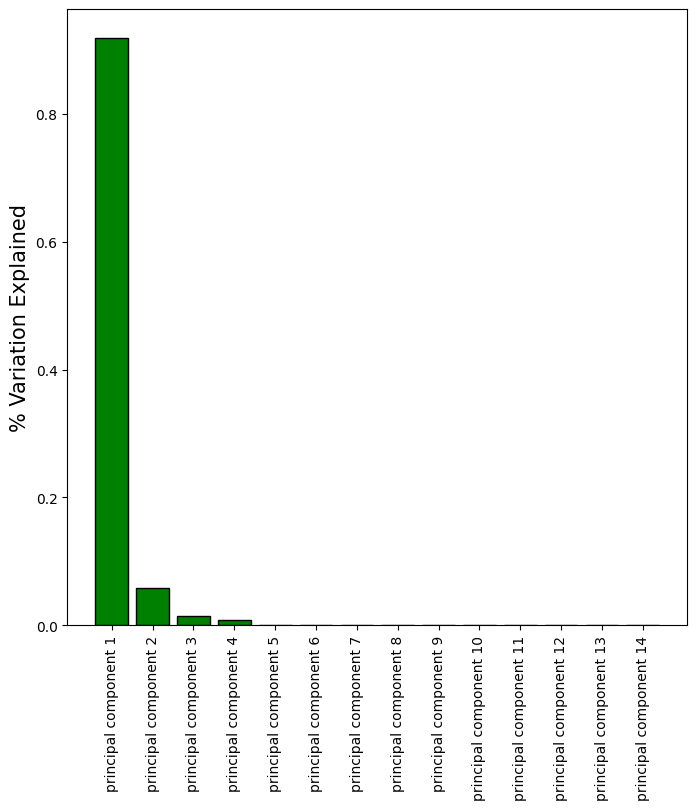

In [ ]:
epf3 = plt.figure(figsize = (8,8))
ep3 = epf3.add_subplot(1,1,1)
ep3.bar(x = labs3, height = n3, color = 'green', edgecolor = 'black')
ep3.set_xticklabels(labs3, rotation = 90)
ep3.set_ylabel('% Variation Explained', fontsize = 15)

print(sum(n3[0:3]))